NAME - **Anurag Choudhury**

ID - **202318059**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler


* Read the UCI SECOM dataset and perform all kinds of data preprocessing
like handling missing values, label encoding, visualization,etc.


In [32]:
df = pd.read_csv('/content/uci-secom.csv')
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
{"type":"dataframe"}
df['Time'] = pd.to_datetime(df['Time'])
# Display the first few rows of the dataframe after converting the date column
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [33]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
# Impute missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
df_imputed = df.copy()
for col in numeric_cols:
    df_imputed[col] = imputer.fit_transform(df[[col]])

# Check for missing values after imputation
print(df_imputed.isnull().sum())

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64


In [23]:
# Label encoding for the 'Pass/Fail' column
label_encoder = LabelEncoder()
df['Pass/Fail'] = label_encoder.fit_transform(df['Pass/Fail'])
# Display the first few rows of the dataframe after label encoding
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,0


* Implement three different feature selection methods of your choice and
apply each technique individually on the dataset.


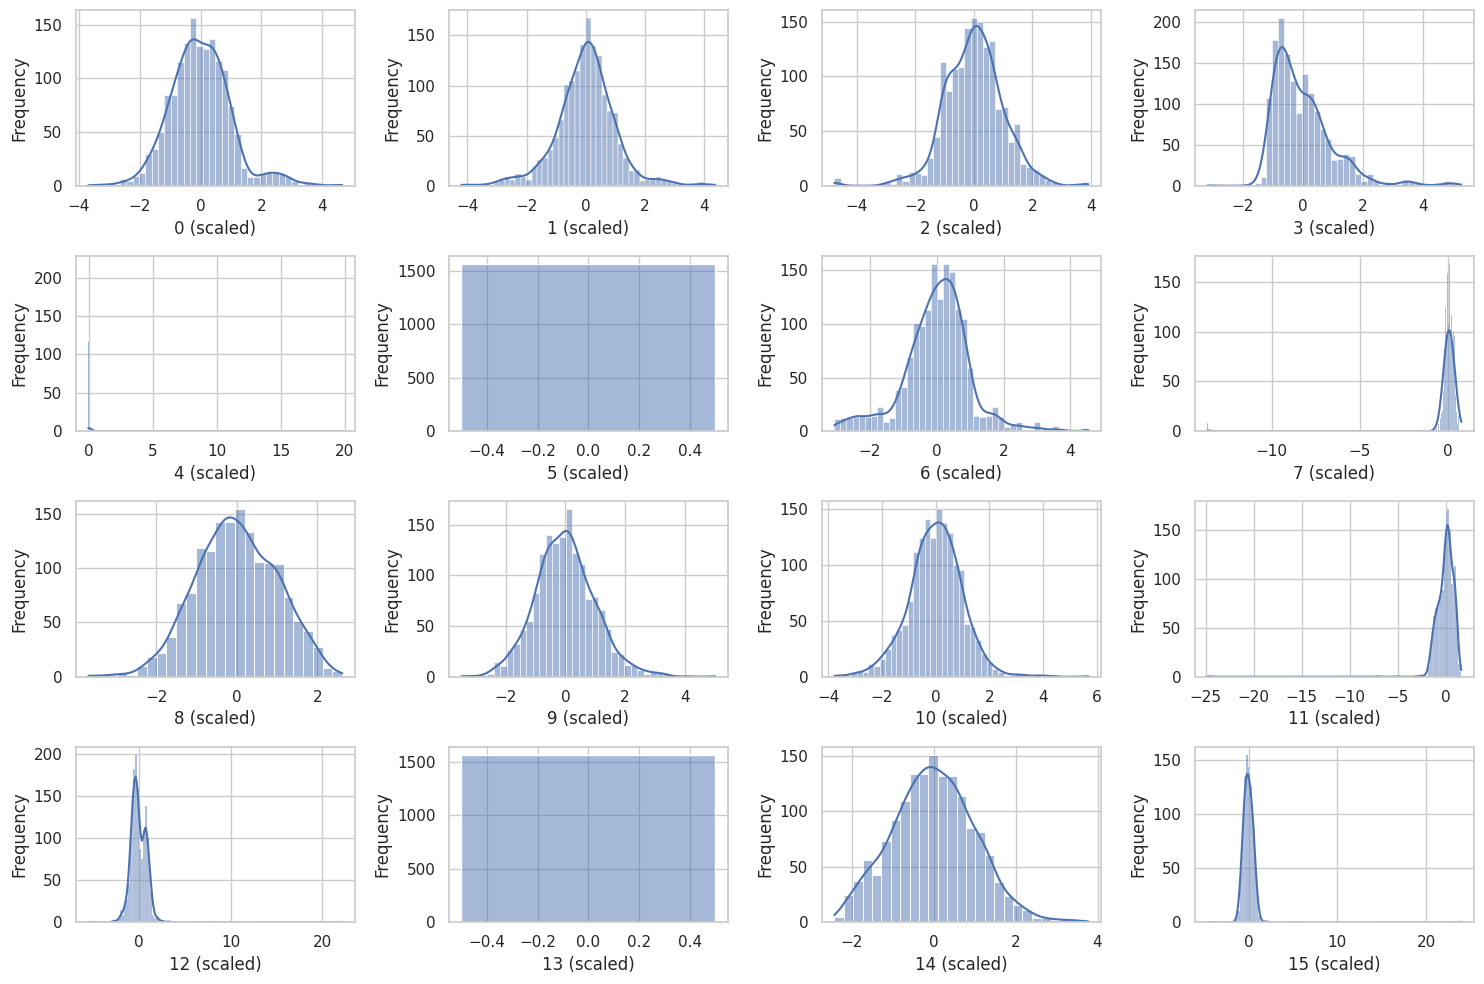

In [26]:
# Perform label encoding for categorical variables if applicable
# Scale numerical features if necessary
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed[numeric_cols]), columns=numeric_cols)

# Visualize the data distribution and relationships between features
# (Use plotting libraries like matplotlib and seaborn)

# Example:
# Histogram of a numerical feature
plt.figure(figsize=(15, 10))
num_cols = len(df_scaled.columns)
num_plots = min(num_cols, 16)  # Maximum 16 subplots in one figure
for i, col in enumerate(df_scaled.columns[:num_plots]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_scaled[col], kde=True)
    plt.xlabel(col + ' (scaled)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

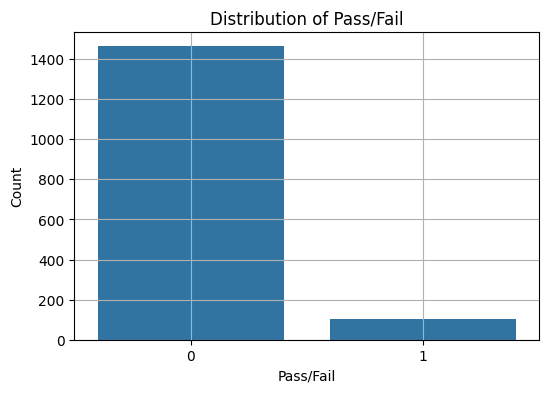

In [11]:
# Plot the distribution of the target variable pass/fail
plt.figure(figsize=(6, 4))
sns.countplot(x='Pass/Fail', data=df)
plt.title('Distribution of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [12]:
# Drop the 'Time' and 'Pass/Fail' columns from the dataset
X = df.drop(['Time', 'Pass/Fail'], axis=1)
y = df['Pass/Fail']

# 1. Random Forest Classifier (RFC) Feature Importance
rf_classifier = RandomForestClassifier()
# Fit the model
rf_classifier.fit(X, y)

rf_feature_importances = rf_classifier.feature_importances_
rf_indices = np.argsort(rf_feature_importances)[::-1]
rf_selected_features = df.columns[rf_indices[:10]]

# 2. Correlation Coefficient
correlation_with_target = df.corr()['Pass/Fail'].sort_values(ascending=False)
correlation_selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# 3. SelectKBest with Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X, y)
kbest_selected_features = X.columns[selector.get_support(indices=True)]
# Combine selected features from all methods
selected_features = set(rf_selected_features).union(correlation_selected_features).union(kbest_selected_features)
# Create a new dataframe with selected features
df_selected = df[list(selected_features)]
print("Selected Features from Random Forest Classifier (RFC) Feature Importance:")
print(rf_selected_features)
print("\nSelected Features based on Correlation Coefficient:")
print(correlation_selected_features)
print("\nSelected Features from SelectKBest with Mutual Information:")
print(kbest_selected_features)

Selected Features from Random Forest Classifier (RFC) Feature Importance:
Index(['58', '63', '209', '64', '266', '347', '15', '39', '24', '538'], dtype='object')

Selected Features based on Correlation Coefficient:
['Pass/Fail', '59', '103', '510', '348', '431', '434', '430', '435', '21', '436', '129', '210', '298', '28']

Selected Features from SelectKBest with Mutual Information:
Index(['33', '41', '247', '277', '407', '428', '477', '571', '573', '577'], dtype='object')


* Implement three different feature transformation techniques of your choice
on TOP 5 best features that you’ll get from each feature selection
technique. These transformations should be applied individually for all
feature selection techniques.

In [16]:
top_features_rf = ['58', '63', '64', '15', '39']
top_features_corr = ['Pass/Fail', '59', '103', '28', '348']
top_features_kbest = ['33', '130', '277', '247', '41']
# Dataframe to store transformed features
df_transformed = df.copy()
# Apply transformations for Random Forest Classifier (RFC) Feature Importance
for feature in top_features_rf:
 df_transformed[feature + '_standardized'] = StandardScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_minmax'] = MinMaxScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_log'] = np.log1p(df[feature])
# Apply transformations for Correlation Coefficient
for feature in top_features_corr:
 df_transformed[feature + '_standardized'] = StandardScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_minmax'] = MinMaxScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_log'] = np.log1p(df[feature])
# Apply transformations for SelectKBest with Mutual Information
for feature in top_features_kbest:
 df_transformed[feature + '_standardized'] = StandardScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_minmax'] = MinMaxScaler().fit_transform(df[[feature]])
 df_transformed[feature + '_log'] = np.log1p(df[feature])
 print(df_transformed.head())

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


                 Time        0        1          2          3       4      5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...   103_log  28_standardized  28_minmax  \
0   97.6133  0.1242  1.5005  ... -0.004209        -1.522972   0.261259   
1  102.3433  0.1247  1.4966  ... -0.004510        -0.311560   0.487686   
2   95.4878  0.1241  1.4436  ... -0.002603        -0.684304   0.418016   
3  104.2367  0.1217  1.4882  ... -0.005917        -1.898926   0.190989   
4  100.3967  0.1235  1.5031  ... -0.004510        -1.927846   0.185584   

     28_log  348_standardized  348_minmax   348_log  33_standardized  \
0 

* Visualize the distribution of transformed features using histograms or
density plots.

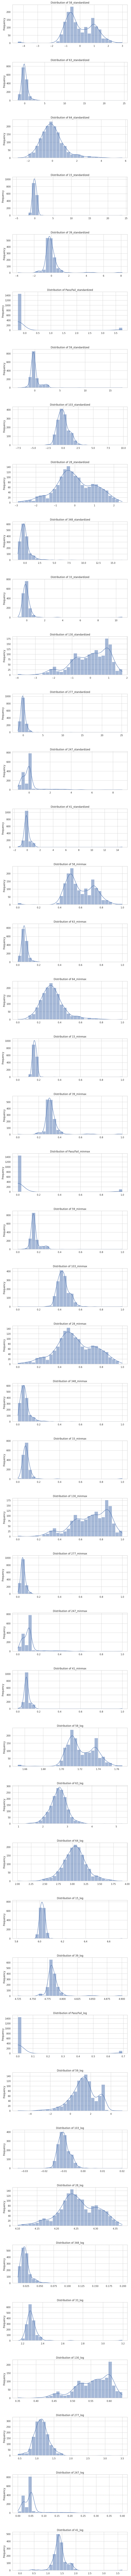

In [17]:
# Select transformed features for visualization
transformed_features = [feature + '_standardized' for feature in
top_features_rf + top_features_corr + top_features_kbest] + [feature + '_minmax' for feature in top_features_rf + top_features_corr + top_features_kbest] + [feature + '_log' for feature in top_features_rf + top_features_corr + top_features_kbest]
# Set the style for the plots
sns.set(style="whitegrid")
# Create subplots for histograms
fig, axes = plt.subplots(len(transformed_features), 1, figsize=(10, 5 * len(transformed_features)))
# Plot histograms for each transformed feature
for i, feature in enumerate(transformed_features):
 sns.histplot(df_transformed[feature].dropna(), kde=True, ax=axes[i], bins=30)
 axes[i].set_title(f'Distribution of {feature}')
 axes[i].set_xlabel('')
 axes[i].set_ylabel('Frequency')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

*  For each method, train a classification model using the selected features to
predict the Pass/Fail.
* Evaluate the performance of the model using appropriate metrics such as
accuracy, precision, recall, and F1-score.


In [30]:
# Target variable
y = df_transformed['Pass/Fail']
# List to store model accuracies
accuracies = []
# Train a classification model for each set of selected features
for method in ['rf', 'corr', 'kbest']:
 if method == 'rf':
  features = [feature + '_standardized' for feature in top_features_rf] +  [feature + '_minmax' for feature in top_features_rf] +  [feature + '_log' for feature in top_features_rf]
 elif method == 'corr':
  features = [feature + '_standardized' for feature in top_features_corr] +  [feature + '_minmax' for feature in top_features_corr] +  [feature + '_log' for feature in top_features_corr]
 elif method == 'kbest':
  features = [feature + '_standardized' for feature in top_features_kbest] +  [feature + '_minmax' for feature in top_features_kbest] +  [feature + '_log' for feature in top_features_kbest]
 # Features
 X = df_transformed[features]
 # Handle missing values by imputing
 imputer = SimpleImputer(strategy='mean')
 X = imputer.fit_transform(X)
 # Split data into train and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Initialize and train the logistic regression model
 model = LogisticRegression(max_iter=10000)
 model.fit(X_train, y_train)
 # Predict on the test set
 y_pred = model.predict(X_test)
 # Calculate accuracy
 accuracy = accuracy_score(y_test, y_pred)
 accuracies.append(accuracy)
 # Print classification report
 print(f"Classification Report for {method.upper()}:\n",
classification_report(y_test, y_pred, zero_division=0))

Classification Report for RF:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314

Classification Report for CORR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00        24

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314

Classification Report for KBEST:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0

* Compare the performance of the model on different feature selection
techniques.

In [28]:
# Print accuracies for each method
for i, method in enumerate(['rf', 'corr', 'kbest']):
 print(f"Accuracy for {method.upper()}: {accuracies[i]:.4f}")

Accuracy for RF: 0.9236
Accuracy for CORR: 1.0000
Accuracy for KBEST: 0.9236
